In [4]:
import sys
sys.path.append(r'C:\Users\edwar\Documents\LabStuff\ibllib\brainbox\io')
import matplotlib.pyplot as plt
import numpy as np
from brainbox.io.one import load_wheel_reaction_times
import brainbox.behavior.wheel as wh
from ibllib.io.raw_data_loaders import *
#from ibllib.pipes.tasks import *
from ibllib.pipes import *
from ibllib.io.extractors.bpod_trials import *
from one.api import ONE
from ONE.one.alf.io import *

from ibllib.io.extractors.ephys_fpga import extract_wheel_moves
from ibllib.io.extractors.training_wheel import extract_first_movement_times
from localAlf import load_wheel_reaction_times_local
from brainbox.behavior.training import *

In [9]:
session_path = r'I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-08-31\002'
subject_id = session_path[session_path.find('iblrig_data')+12:session_path.find('iblrig_data')+24]
date = session_path[session_path.find(subject_id)+13:session_path.find(subject_id)+23]
# bpod_data = load_data(session_path)
# #stim_pos = load_stim_position_screen(session_path)
# encoder_events = load_encoder_events(session_path)
# encoder_pos = load_encoder_positions(session_path)

2023-09-03 17:45:30.659 INFO     [bpod_trials.py:29] Extracting I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-08-31\002 as training
INFO:ibllib.io.extractors.bpod_trials:Extracting I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-08-31\002 as training


2023-09-03 17:45:31.212 INFO     [bpod_trials.py:32] training session on _iblrig_testlab_behavior_1
INFO:ibllib.io.extractors.bpod_trials:training session on _iblrig_testlab_behavior_1
2023-09-03 17:45:32.312 INFO     [training_wheel.py:296] Wheel in rad units using X1 encoding
INFO:ibllib.io.extractors.training_wheel:Wheel in rad units using X1 encoding
2023-09-03 17:45:36.631 INFO     [bpod_trials.py:69] session extracted 

INFO:ibllib.io.extractors.bpod_trials:session extracted 

2023-09-03 17:45:36.683 INFO     [training_wheel.py:296] Wheel in rad units using X1 encoding
INFO:ibllib.io.extractors.training_wheel:Wheel in rad units using X1 encoding


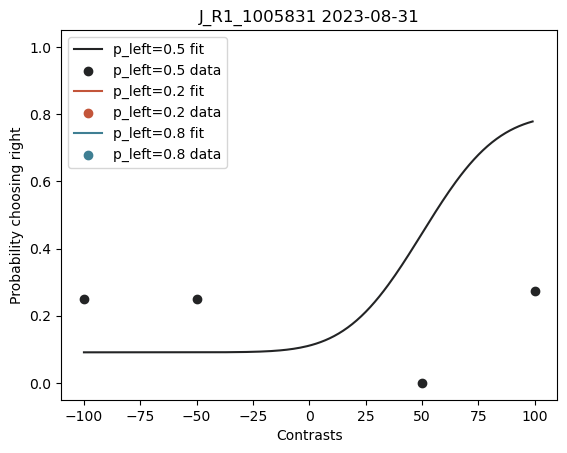

In [10]:
trials, wheel, output_files = extract_all(session_path, save=True)
wheel= load_object(session_path+'\\alf', 'wheel')
wheel_moves = extract_wheel_moves(wheel.timestamps, wheel.position)
trial_data = load_object(session_path+'\\alf', 'trials')

# # Replace nans with zeros
trial_data.contrastRight[np.isnan(trial_data.contrastRight)] = 0
trial_data.contrastLeft[np.isnan(trial_data.contrastLeft)] = 0

psych_fig, psych_ax = plot_psychometric(trial_data, ax=None, title=None, plot_ci=False, ci_aplha=0.32)
plt.title(subject_id+' '+date)
psych_fig.savefig(session_path+'\\psychometric_curve.png')



In [30]:
trial_data['goCue_times']

array([   4.8827,   15.0989,   26.7023,   35.8754,   43.6253,   52.9674,
         59.2731,   65.6759,   72.2006,   80.2336,  128.7882,  148.0535,
        161.7091,  168.894 ,  182.7336,  200.9377,  223.9894,  237.311 ,
        249.9235,  270.0708,  279.946 ,  291.4654,  296.837 ,  318.5745,
        324.4452,  341.8663,  361.5746,  372.9819,  391.7091,  406.3509,
        415.767 ,  428.6455,  437.1805,  442.4261,  449.0559,  454.8446,
        462.0544,  467.8451,  475.243 ,  481.4937,  488.3445,  502.3271,
        510.1281,  519.1421,  528.9072,  539.5625,  547.6645,  561.054 ,
        568.3099,  573.5735,  590.2265,  606.7184,  618.8798,  626.3917,
        633.2675,  638.7052,  649.3374,  656.8393,  686.3888,  707.177 ,
        847.2657,  859.4081,  869.0872,  889.5566,  895.3123,  918.397 ,
        952.288 ,  976.0408,  998.3931, 1179.2777, 1212.1665, 1235.6493,
       1246.6476, 1252.8283, 1261.1943, 1266.0319, 1271.3835, 1280.3355,
       1301.295 , 1309.305 , 1337.2742, 1343.2479, 

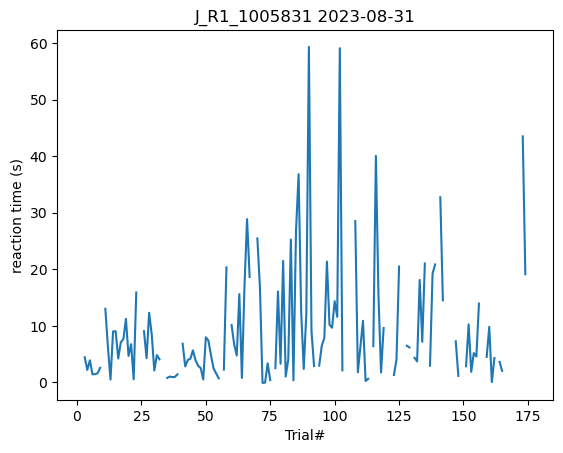

In [11]:
rt = load_wheel_reaction_times_local(session_path+'\\alf')
plt.plot(range(1,len(rt)+1), rt)
plt.title(subject_id+' '+date)
plt.xlabel('Trial#')
plt.ylabel('reaction time (s)')
plt.savefig(session_path+'\\reaction_time.png')
plt.show()

In [72]:
np.where(trial_data['feedbackType'] == 1)

(array([  1,   2,   5,   6,   7,  10,  12,  13,  14,  16,  22,  24,  25,
         27,  28,  29,  37,  38,  39,  40,  41,  42,  43,  49,  52,  53,
         55,  56,  57,  58,  61,  62,  66,  67,  68,  69,  70,  71,  72,
         73,  75,  76,  77,  78,  79,  86,  87,  94,  97, 101, 103, 104,
        107, 108, 109, 110, 112, 114, 117, 118, 119, 120, 123, 125, 126,
        127, 131, 132, 133, 135, 137, 139, 141, 142, 143, 146, 147, 149,
        159, 164, 166, 171, 172, 173, 175, 178, 181, 182, 184, 186, 187,
        190, 191, 197, 201, 204, 205, 206, 207, 208, 211, 212, 213, 214,
        215, 216, 217, 220], dtype=int64),)

In [54]:
trial_correct_progression = np.histogram(np.where(trial_data['feedbackType'] == 1), bins=range(20, len(trial_data['feedbackType'])+1, 20))
trial_correct_progression =  trial_correct_progression[0] /20
print(trial_correct_progression)


[0.6  0.4  0.5  0.4  0.4  0.35]


In [85]:
date_path = r'I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-09-04'
subject_id = date_path[date_path.find('iblrig_data')+12:date_path.find('iblrig_data')+24]
date = date_path[date_path.find(subject_id)+13:date_path.find(subject_id)+23]
session_count = 0
for dir in os.listdir(date_path):
    if 'complete' not in dir:
        continue

    session_path = date_path + '\\' + dir
    trials, wheel, output_files = extract_all(session_path, save=True)
    numTrial = len(trials['repNum'])
    temp_trial_data = load_object(session_path+'\\alf', 'trials')

    # # Replace nans with zeros
    temp_trial_data.contrastRight[np.isnan(temp_trial_data.contrastRight)] = 0
    temp_trial_data.contrastLeft[np.isnan(temp_trial_data.contrastLeft)] = 0

    if session_count == 0:
        trial_data = temp_trial_data
    else:
        trial_data.append(temp_trial_data, inplace=True)
    session_count += 1
    print('Number of trials in session#' + str(session_count) + ': ' + str(numTrial) )



    

2023-09-04 23:41:06.688 INFO     [bpod_trials.py:29] Extracting I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-09-04\005_complete as training
INFO:ibllib.io.extractors.bpod_trials:Extracting I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-09-04\005_complete as training
2023-09-04 23:41:06.703 INFO     [bpod_trials.py:32] training session on _iblrig_testlab_behavior_1
INFO:ibllib.io.extractors.bpod_trials:training session on _iblrig_testlab_behavior_1


2023-09-04 23:41:06.770 INFO     [training_wheel.py:296] Wheel in rad units using X1 encoding
INFO:ibllib.io.extractors.training_wheel:Wheel in rad units using X1 encoding
2023-09-04 23:41:06.961 INFO     [bpod_trials.py:69] session extracted 

INFO:ibllib.io.extractors.bpod_trials:session extracted 

Number of trials in session#1: 12
2023-09-04 23:41:07.13 INFO     [bpod_trials.py:29] Extracting I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-09-04\007_complete as training
INFO:ibllib.io.extractors.bpod_trials:Extracting I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-09-04\007_complete as training
2023-09-04 23:41:07.112 INFO     [bpod_trials.py:32] training session on _iblrig_testlab_behavior_1
INFO:ibllib.io.extractors.bpod_trials:training session on _iblrig_testlab_behavior_1
2023-09-04 23:41:07.141 WARNING  [training_trials.py:341] I:\Cerebellum_Imaging_Project\iblrig_data\J_R1_1005831\2023-09-04\007_complete: Missing BNC2 TTLs on 1 trials
2023-09-04 23:41

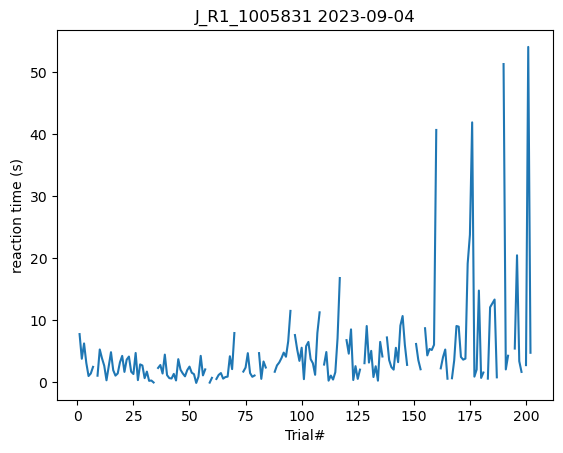

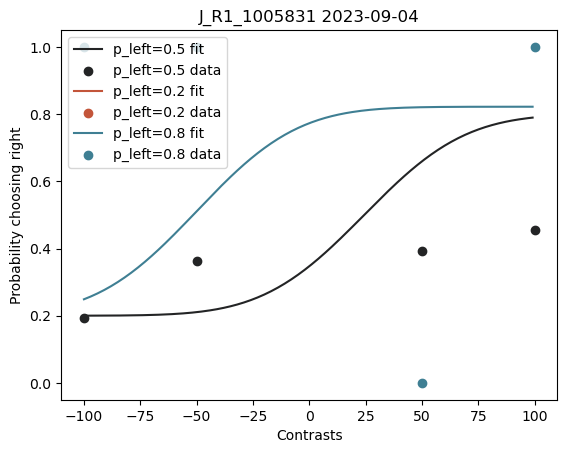

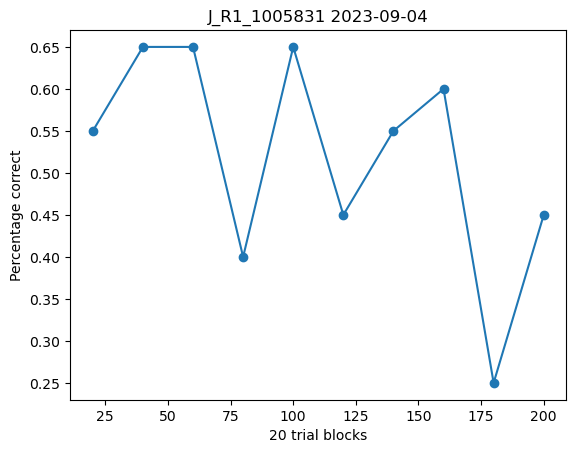

In [86]:
rt = trial_data['firstMovement_times'] - trial_data['goCue_times']
plt.plot(range(1,len(rt)+1), rt)
plt.title(subject_id+' '+date)
plt.xlabel('Trial#')
plt.ylabel('reaction time (s)')
plt.savefig(date_path+'\\reaction_time.png')
plt.show()

psych_fig, psych_ax = plot_psychometric(trial_data, ax=None, title=None, plot_ci=False, ci_aplha=0.32)
plt.title(subject_id+' '+date)
psych_fig.savefig(date_path+'\\psychometric_curve.png')

trial_correct_hist, bin_edges = np.histogram(np.where(trial_data['feedbackType'] == 1), bins=range(0, len(trial_data['feedbackType'])+1, 20))
trial_correct_frac =  trial_correct_hist /20

plt.figure()
plt.plot(bin_edges[1:], trial_correct_frac, '-o')
plt.title(subject_id+' '+date)
plt.xlabel('20 trial blocks')
plt.ylabel('Percentage correct')
plt.savefig(date_path+'\\session_correct_progression.png')
plt.show()


In [71]:
trial_correct_hist, bin_edges = np.histogram(np.where(trial_data['feedbackType'] == 1), bins=range(0, len(trial_data['feedbackType'])+1, 20))
trial_correct_frac =  trial_correct_hist /20
print(bin_edges)
print(trial_correct_frac)

[  0  20  40  60  80 100 120 140 160 180 200 220]
[0.5  0.45 0.55 0.75 0.2  0.6  0.55 0.35 0.35 0.4  0.7 ]


In [23]:
''.join(os.listdir(date_path + '\\001\\raw_behavior_data'))

'_iblrig_encoderEvents.raw.ssv_iblrig_encoderPositions.raw.ssv_iblrig_encoderTrialInfo.raw.ssv_iblrig_stimPositionScreen.raw.csv_iblrig_syncSquareUpdate.raw.csv'

### The movements algorithm
The wheel movement onsets and offsets are calculated using the `wheel.movements` function.  The output of this function is saved in the 'wheelMoves' ALF.

Refer to the `wheel.movements` function docstring for details of how the movements are detected.  In addition to the data found in the wheelMoves object, the function outputs an array of peak velocity times.  Also the function has a `make_plots` flag which will produce plots of the wheel position and velocity with the movement onsets and offsets highlighted (see below).

The movements algorithm requires the positions and timestamps to be evenly sampled so they should be interpolated first, which can be done with the `wheel.interpolate_position` function.  The default sampling frequency is 1000Hz:

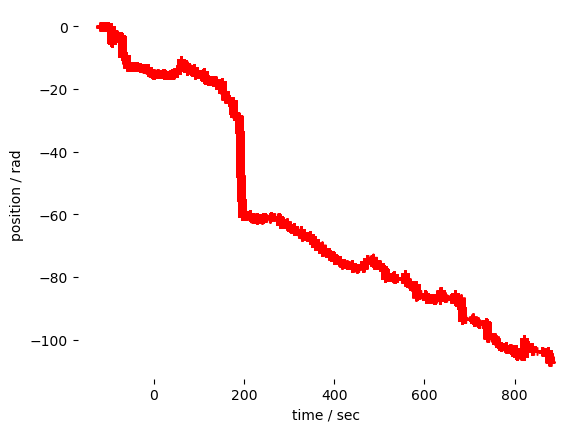

In [117]:
pos, t = wh.interpolate_position(wheel.timestamps, wheel.position)
sec = 1000  # Number of seconds to plot
plt.figure()

# Plot the interpolated data points
mask = t < (t[0] + sec)
plt.plot(t[mask], pos[mask], '.', markeredgecolor='lightgrey', markersize=1)

# Plot the original data
mask = wheel.timestamps < (wheel.timestamps[0] + sec)
plt.plot(wheel.timestamps[mask], wheel.position[mask], 'r+', markersize=6)

# Labels etc.
plt.xlabel('time / sec')
plt.ylabel('position / rad')
plt.box(on=None)
plt.show()

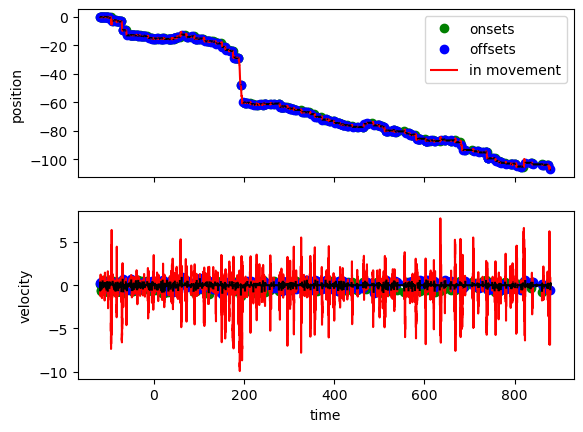

In [118]:
# Convert the pos threshold defaults from samples to correct unit
thresholds_cm = wh.samples_to_cm(np.array([8, 1.5]), resolution=wh.ENC_RES)
thresholds = wh.cm_to_rad(thresholds_cm)
mask = t < (t[0] + sec)

onsets, offsets, peak_amp, peak_vel_times = wh.movements(
    t[mask], pos[mask], pos_thresh=thresholds[0], pos_thresh_onset=thresholds[0], make_plots=True)
plt.show()

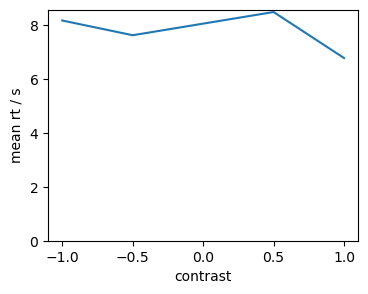

In [119]:
rt = load_wheel_reaction_times_local(session_path+'\\alf')
trial_data = load_object(session_path+'\\alf', 'trials')

# # Replace nans with zeros
trial_data.contrastRight[np.isnan(trial_data.contrastRight)] = 0
trial_data.contrastLeft[np.isnan(trial_data.contrastLeft)] = 0

contrast = trial_data.contrastRight - trial_data.contrastLeft
mean_rt = [np.nanmean(rt[contrast == c]) for c in set(contrast)]

# RT may be nan if there were no detected movements, or if the goCue or stimOn times were nan
xdata = np.unique(contrast)
plt.figure(figsize=(4, 3))  # Some sort of strange behaviour in this cell's output
plt.plot(xdata, mean_rt);

plt.xlabel('contrast')
plt.ylabel('mean rt / s')
plt.ylim(bottom=0);
plt.show()

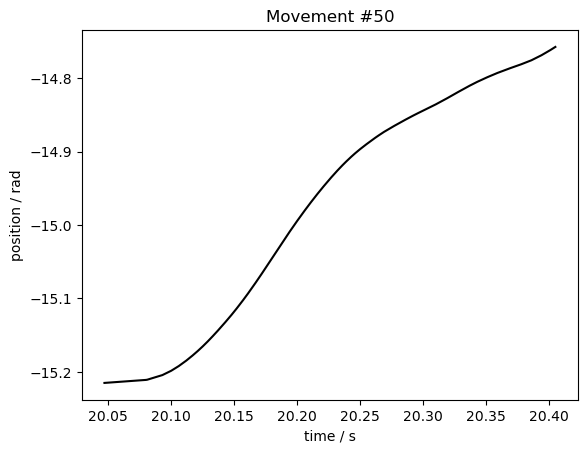

In [120]:
Fs = 1000
pos, t = wh.interpolate_position(wheel.timestamps, wheel.position, freq=Fs)
vel, acc = wh.velocity_smoothed(pos, Fs)
n = 50
on, off = wheel_moves['intervals'][n,]
mask = np.logical_and(t > on, t < off)
sng = np.sign(vel[mask])
idx, = np.where(np.diff(sng) != 0)

plt.figure()
plt.plot(t[mask], pos[mask], 'k')
for i in idx:
    plt.axvline(x=t[mask][i], color='k', linestyle=':')

plt.title('Movement #%s' % n)
plt.xlabel('time / s')
plt.ylabel('position / rad');
plt.show()

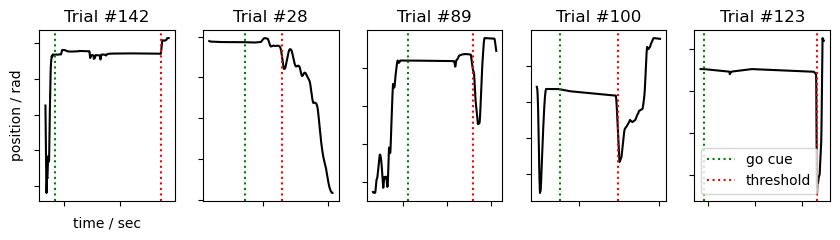

In [89]:
n_trials = 5  # Number of trials to plot
# Randomly select the trials to plot
trial_ids = np.random.randint(trial_data['choice'].size, size=n_trials)
fig, axs = plt.subplots(1, n_trials, figsize=(8.5,2.5))
plt.tight_layout()

# Plot go cue and response times
goCues = trial_data['goCue_times'][trial_ids]
responses = trial_data['response_times'][trial_ids]

# Plot traces between trial intervals
starts = trial_data['intervals'][trial_ids, 0]
ends = trial_data['intervals'][trial_ids, 1]
# Cut up the wheel vectors
traces = wh.traces_by_trial(t, pos, start=starts, end=ends)
zipped = zip(traces, axs, goCues, responses, trial_ids)

for (trace, ax, go, resp, n) in zipped:
    ax.plot(trace[0], trace[1], 'k-')
    ax.axvline(x=go, color='g', label='go cue', linestyle=':')
    ax.axvline(x=resp, color='r', label='threshold', linestyle=':')
    ax.set_title('Trial #%s' % n)

    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])

# Add labels to first
axs[0].set_xlabel('time / sec')
axs[0].set_ylabel('position / rad')
plt.legend();
plt.tight_layout()
plt.show()

In [93]:
psych = compute_psychometric(trial_data, signed_contrast=None, block=None, plotting=True, compute_ci=False, alpha=0.32)

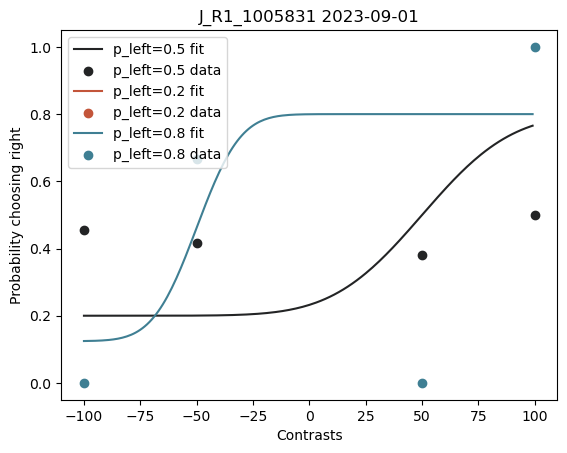

In [121]:
psych_fig, psych_ax = plot_psychometric(trial_data, ax=None, title=None, plot_ci=False, ci_aplha=0.32)
plt.title(subject_id+' '+date)
psych_fig.savefig(session_path+'\\psychometric_curve.png')

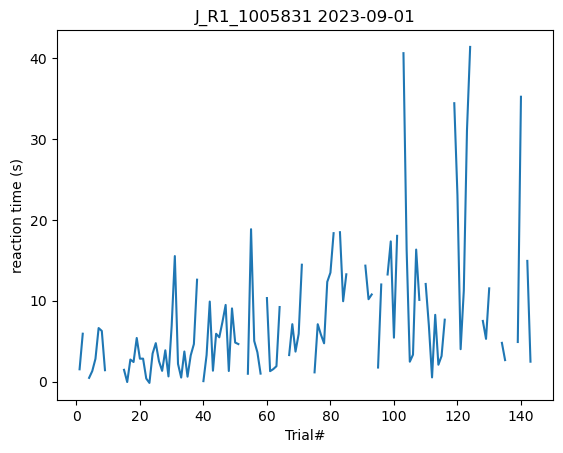

In [122]:
plt.plot(range(1,len(rt)+1), rt)
plt.title(subject_id+' '+date)
plt.xlabel('Trial#')
plt.ylabel('reaction time (s)')
plt.savefig(session_path+'\\reaction_time.png')
plt.show()
